# A simple neural network with one hidden layer in pure Python

## Introduction
We consider a simple feed-forward neural network with one hidden layer:

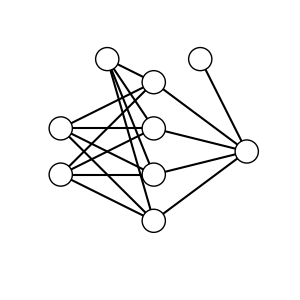

In this example the input vector of the neural network has two features, i.e., the input is a two-dimensional vector:

$$
\mathbf x = (x_0, x_1).
$$

We consider a set of $m$ vectors as training data. The training data can therefore be written as a $n \times 2$ matrix where each row represents a feature vector:

$$ 
X = 
\begin{pmatrix}
x_{00} & x_{01} \\
x_{10} & x_{11} \\
\vdots & \vdots \\
x_{m-1\,0} & x_{m-1\,1} 
\end{pmatrix} $$

The known labels (1 = 'signal', 0 = 'background') are stored in a $n$-dimensional column vector $\mathbf y$.

In the following, $n_1$ denotes the number of neurons in the hidden layer. The weights for the connections from the input layer (layer 0) to the hidden layer (layer 0) are given by the following matrix:

$$
W^{(1)} = 
\begin{pmatrix}
w_{00}^{(1)} \dots w_{0 \, n_1-1}^{(1)} \\
w_{10}^{(1)} \dots w_{1 \, n_1-1}^{(1)} 
\end{pmatrix}
$$

Each neuron in the hidden layer is assigned a bias $\mathbf b^{(1)} = (b^{(1)}_0, \ldots, b^{(1)}_{n_1-1})$. The neuron in the output layer has the bias $\mathbf b^{(2)}$. With that, the output values of the network for the matrix $X$ of input feature vectors is given by

$$
\begin{align}
Z^{(1)} &= X W^{(1)} + \mathbf b^{(1)} \\
A^{(1)} &= \sigma(Z^{(1)}) \\
Z^{(2)} &= A^{(1)} W^{(2)} + \mathbf b^{(2)} \\
A^{(2)} &= \sigma(Z^{(2)})
\end{align}
$$

The loss function for a given set of weights is given by

$$ L = \sum_{k=0}^{m-1} (y_{\mathrm{pred},k} - y_{\mathrm{true},k})^2 $$

We can know calculate the gradient of the loss function w.r.t. the wights. With the definition $\hat L = (y_\mathrm{pred} - y_\mathrm{true})^2$, the gradients for the weights from the output layer to the hidden layer are given by: 

$$ \frac{\partial \tilde L}{\partial w_i^{(2)}} = \frac{\partial \tilde L}{a_k^{(2)}} \frac{a_k^{(2)}}{\partial w_i^{(2)}} = \frac{\partial \tilde L}{a_k^{(2)}} \frac{a_k^{(2)}}{z_k^{(2)}} \frac{z_k^{(2)}}{\partial w_i^{(2)}} = 2 (a_k^{(2)} - y_k) a_k^{(2)} (1 - a_k^{(2)}) a_{k,i}^{(1)} \equiv \delta^{(2)}_k a_{k,i}^{(1)}$$

Applying the chain rule further, we also obtain the gradient for the weights from the input layer to the hidden layer read: 

$$ \frac{\partial \tilde L}{\partial w_{ij}^{(1)}} = \frac{\partial \tilde L}{\partial a_k^{(2)}} \frac{\partial a_k^{(2)}}{\partial z_k^{(2)}} \frac{\partial z_k^{(2)}}{\partial a_{k,j}^{(1)}} \frac{\partial a_{k,j}^{(1)}}{\partial z_{k,j}^{(1)}} \frac{\partial z_{k,j}^{(1)}}{\partial w_{ij}^{(1)}} $$



## A simple neural network class

In [3]:
# A simple feed-forward neutral network with on hidden layer
# see also https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

import numpy as np

class NeuralNetwork:
    def __init__(self, x, y):
        n1 = 3 # number of neurons in the hidden layer
        self.input         = x
        self.weights1      = np.random.rand(self.input.shape[1],n1)
        self.bias1         = np.random.rand(n1)
        self.weights2      = np.random.rand(n1,1)
        self.bias2         = np.random.rand(1)                 
        self.y             = y
        self.output        = np.zeros(y.shape)
        self.learning_rate = 0.01
        self.n_train       = 0
        self.loss_history  = []

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self):
        self.layer1 = self.sigmoid(self.input @ self.weights1 + self.bias1)
        self.output = self.sigmoid(self.layer1 @ self.weights2 + self.bias2)

    def backprop(self):

        # delta2: [m, 1], m = number of training data
        delta2 = 2 * (self.y - self.output) * self.sigmoid_derivative(self.output)

        # Gradient w.r.t. weights from hidden to output layer: [n1, 1] matrix, n1 = # neurons in hidden layer
        # self.layer1.T: m x n1 matrix
        d_weights2 = self.layer1.T @ delta2
        d_bias2    = np.sum(delta2)

        print(self.layer1.shape) 
    
        # shape of delta1: [m, n1], m = number of training data, n1 = # neurons in hidden layer
        delta1     = (delta2 @ self.weights2.T) * self.sigmoid_derivative(self.layer1)
        d_weights1 = self.input.T @ delta1
        d_bias1    = np.ones(delta1.shape[0]) @ delta1 
        
        # update weights and biases
        self.weights1 += self.learning_rate * d_weights1
        self.weights2 += self.learning_rate * d_weights2

        self.bias1    += self.learning_rate * d_bias1
        self.bias2    += self.learning_rate * d_bias2

    def train(self, X, y):
        self.output = np.zeros(y.shape)
        self.input = X
        self.y = y
        self.feedforward()
        self.backprop()
        self.n_train += 1
        if (self.n_train %1000 == 0):
            loss = np.sum((self.y - self.output)**2)
            print("loss: ", loss)
            self.loss_history.append(loss)
    
    def predict(self, X):
        self.output = np.zeros(y.shape)
        self.input = X
        self.feedforward()
        return self.output
    
    def loss_history(self):
        return self.loss_history


## Create toy data
We create three toy data sets
1. two moon-like distributions
2. circles
3. linearly separable data sets

In [4]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(n_samples=200, noise=0.1, random_state=0),
    make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1),
    linearly_separable,
]

## Create training and test data set

In [5]:
# datasets: 0 = moons, 1 = circles, 2 = linearly separable
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


## Train the model

In [6]:
y_train = y_train.reshape(-1, 1)

nn = NeuralNetwork(X_train, y_train)

for i in range(100000):
    nn.train(X_train, y_train)


(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(120, 3)
(

## Plot the loss vs. the number of epochs

Text(0, 0.5, 'loss')

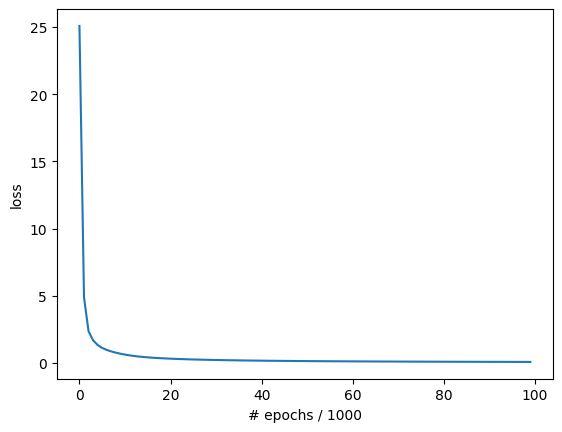

In [7]:
import matplotlib.pyplot as plt
plt.plot(nn.loss_history)
plt.xlabel("# epochs / 1000")
plt.ylabel("loss")

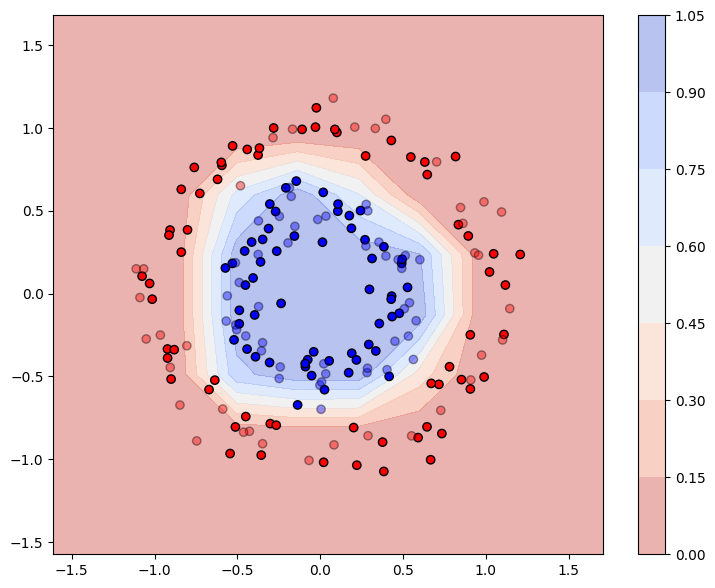

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

xv = np.linspace(x_min, x_max, 10)
yv = np.linspace(y_min, y_max, 10)
Xv, Yv = np.meshgrid(xv, yv)
XYpairs = np.vstack([ Xv.reshape(-1), Yv.reshape(-1)])
zv = nn.predict(XYpairs.T)
Zv = zv.reshape(Xv.shape)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
ax.set_aspect(1)
cn = ax.contourf(Xv, Yv, Zv, cmap="coolwarm_r", alpha=0.4)

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4, edgecolors="k")

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
# ax.set_xticks(())
# ax.set_yticks(())

fig.colorbar(cn)
